# Forex Renko Charts using EOD data

This code plots the end of day forex renko charts in Python. It makes use of the mplfinance and the investpy packages.

For more information visit:
- 

To install the packages visit: 
- mplfinance: https://pypi.org/project/mplfinance/ 
- investpy: https://pypi.org/project/investpy/

## Import packages
Import
- pandas (For dataframe handling)
- investpy (For fetching the EOD forex data)
- mplfinance (For rendering the renko charts)
- datetime (For time handling)
- matplotlib.ticker (For using 4-decimals on Y-axis)

In [70]:
import pandas as pd
from pandas_datareader import data as pdr
import investpy
import mplfinance as fplt
from datetime import datetime
from pandas.tseries.offsets import BDay
from matplotlib.ticker import FormatStrFormatter

## Create Variables
- size1 = the renko brick size for the **main renko chart**
- size2 = the renko brick size for the **second renko chart**
- ccy = the currency pair in format **xxx/yyy**
- l_bd = gets today's date and picks the previous business day and using strftime, convert to a format investpy uses which is **dd/mm/yyyy**

In [76]:
#Input the main Renko and lower renko box sizes here
size1 = 0.0050
size2 = 0.0010

#Input the currency here
ccy = 'USD/CAD'

#Gets the last business day
l_bd = datetime.today() - BDay(1)
l_bd = l_bd.strftime("%d/%m/%Y")
bd = datetime.today() - BDay(1)
bd_filter = bd.strftime("%Y-%m-%d")

## Get data and save to dataframe

In [81]:
# By default, the start date is set to 01/01/2010. You can change this if you want
df = investpy.get_currency_cross_historical_data(currency_cross=ccy,
                                                 from_date='01/01/2010', \
                                                 to_date=l_bd)
#Note that date is automatically set as index, so there is nothing more to do for you here
print("\nPrinting the first five rows of the dataframe")
df.head()


Printing the first five rows of the dataframe


,Open,High,Low,Close,Currency
Date,,,,,
2010-01-01,1.0539,1.0541,1.0520,1.0520,CAD
2010-01-04,1.0520,1.0520,1.0353,1.0417,CAD
2010-01-05,1.0417,1.0427,1.0337,1.0396,CAD
2010-01-06,1.0387,1.0412,1.0312,1.0318,CAD
2010-01-07,1.0320,1.0375,1.0292,1.0347,CAD


In [67]:
print("\nPrinting the last five rows of the dataframe")
df.tail()


Printing the last five rows of the dataframe


,Open,High,Low,Close,Currency
Date,,,,,
2021-07-12,1.2442,1.2515,1.2442,1.2451,CAD
2021-07-13,1.2454,1.2541,1.2440,1.2510,CAD
2021-07-14,1.2511,1.2527,1.2429,1.2506,CAD
2021-07-15,1.2508,1.2615,1.2499,1.2592,CAD
2021-07-16,1.2593,1.2622,1.2559,1.2611,CAD


## Plot renko charts

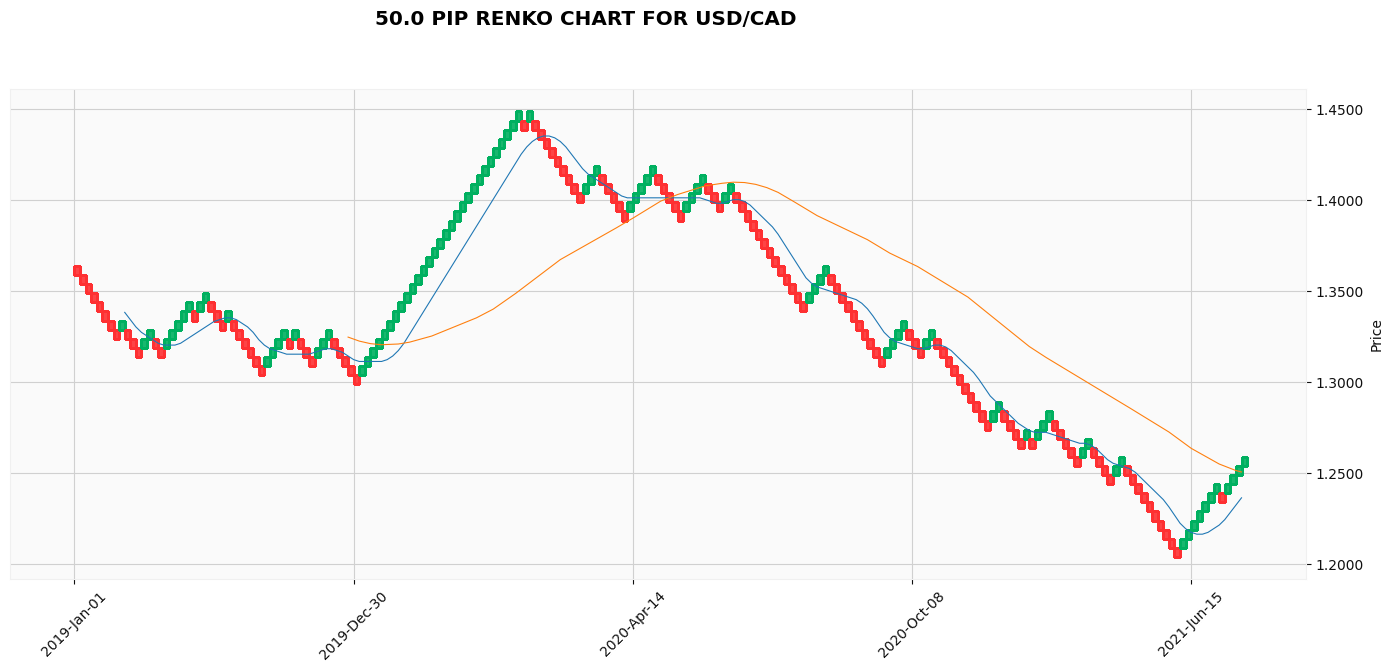

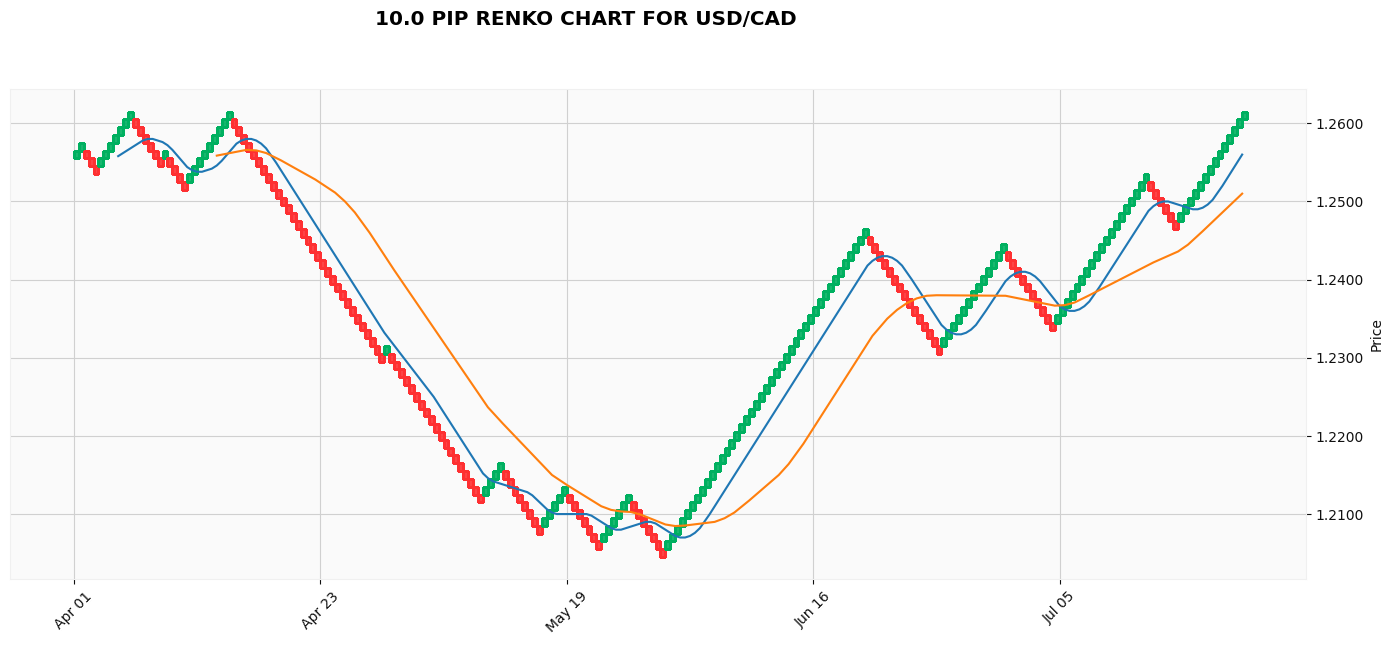

In [93]:
#Print the main renko chart using the larger brick size
#Change mav=() values to set the simple moving average values of your choice
fig,axlist = fplt.plot(df['2019-01-01':bd_filter],type='renko',renko_params=dict(brick_size=size1),\
          mav = (10,50),style='yahoo',figsize =(18,7), \
          title = "{0} PIP RENKO CHART FOR {1}".format(size1*10000, ccy),returnfig=True)
axlist[0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fplt.show()
#Print the second renko chart using the larger brick size
#Change mav=() values to set the simple moving average values of your choice
fig,axlist = fplt.plot(df['2021-04-01':bd_filter],type='renko',renko_params=dict(brick_size=size2),\
          mav = (10,30),style='yahoo',figsize =(18,7), \
          title = "{0} PIP RENKO CHART FOR {1}".format(size2*10000, ccy),returnfig=True)
axlist[0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fplt.show()